# **Feature Engineering - "Predictive House Engineering"**

# Unzip Data

Kode ini digunakan untuk mengekstrak file ZIP bernama house_dataset.zip ke dalam folder dataset. Dengan bantuan modul zipfile dan os, program ini memastikan folder tujuan tersedia, lalu membuka dan mengekstrak seluruh isi file ZIP ke folder tersebut. Proses ini berguna untuk mempersiapkan dataset agar bisa langsung digunakan dalam analisis atau pelatihan model tanpa perlu ekstraksi manual.

In [18]:
import zipfile
import os

zip_path = 'house_dataset.zip'
extract_path = 'dataset'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Understand Data

Kode ini digunakan untuk membaca dataset Housing.csv yang telah diekstrak sebelumnya dari folder dataset menggunakan library pandas. Dataset dimuat ke dalam sebuah objek DataFrame bernama dataframe, yang merupakan struktur data utama dalam pandas untuk menyimpan data tabular.

In [19]:
import pandas as pd
import numpy as np
import pandas as pd

data_path = "dataset/Housing.csv"
dataframe = pd.read_csv(data_path)
print(dataframe.head)
print(dataframe.columns)

<bound method NDFrame.head of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no  

# Check Missing Values

Kode ini digunakan untuk mendeteksi jumlah data yang hilang (missing values) di setiap kolom dalam DataFrame. Dengan menggunakan dataframe.isnull().sum(), yang dapat menghitung jumlah nilai kosong (null) per kolom, dan hasilnya disimpan dalam variabel missing.

In [20]:
missing = dataframe.isnull().sum()
print("Missing values per column: ")
missing[missing > 0]

Missing values per column: 


,0


# Outlier Handling

Kode ini digunakan untuk membersihkan data numerik dari nilai kosong dan outlier. Pertama, kolom numerik seperti area, bedrooms, bathrooms, dll., diisi nilai kosongnya dengan nilai median masing-masing kolom untuk menjaga konsistensi data. Selanjutnya, outlier dideteksi menggunakan metode IQR (Interquartile Range), yaitu dengan menghitung selisih antara kuartil ke-3 (Q3) dan kuartil ke-1 (Q1). Data yang berada di luar batas bawah dan atas (Q1 - 1.5IQR dan Q3 + 1.5IQR) dianggap outlier dan dihapus. Kode ini juga menampilkan jumlah data sebelum dan sesudah proses pembuangan outlier agar kita dapat melihat dampaknya terhadap ukuran dataset.

In [21]:
numeric_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

dataframe[numeric_cols] = dataframe[numeric_cols].fillna(dataframe[numeric_cols].median())

Q1 = dataframe[numeric_cols].quantile(0.25)
Q3 = dataframe[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum buang outlier: {dataframe.shape[0]}")

condition = ((dataframe[numeric_cols] < lower_bound) | (dataframe[numeric_cols] > upper_bound))
dataframe = dataframe[~condition.any(axis=1)]

print(f"Jumlah data setelah buang outlier: {dataframe.shape[0]}")

Jumlah data sebelum buang outlier: 545
Jumlah data setelah buang outlier: 463


# Feature Engineering

Kode ini menambahkan fitur baru bernama PricePerSqFt ke dalam DataFrame, yang dihitung dengan membagi harga rumah (price) dengan luas bangunan (area). Fitur ini merepresentasikan harga per satuan luas (misalnya per meter persegi), yang berguna untuk menganalisis atau membandingkan nilai properti secara lebih adil, terutama ketika ukuran rumah berbeda-beda.

In [22]:
dataframe['PricePerSqFt'] = dataframe['price'] / dataframe['area']  # harga per area
print("Fitur Baru:")
print(dataframe[['PricePerSqFt']].head())

Fitur Baru:
    PricePerSqFt
15   1516.666667
16   1378.787879
18   1932.608696
19   1379.283489
20   2025.462963


# Define X and Y

Kode ini digunakan untuk memisahkan data menjadi fitur (X) dan target (y) sebagai persiapan untuk proses pelatihan model machine learning. Kolom price dijadikan target variabel (y) karena merupakan nilai yang ingin diprediksi (harga rumah), sedangkan X berisi seluruh kolom selain price yang digunakan sebagai input fitur untuk model.

In [23]:
y = dataframe['price']
X = dataframe.drop(['price'], axis=1)

# Understanding Continuous/Numeric and Categorical Features

Kode ini mendefinisikan daftar kolom dalam dataset yang dikelompokkan berdasarkan jenis datanya, yaitu fitur numerik dan fitur kategorikal. Kolom-kolom seperti area, bedrooms, hingga PricePerSqFt termasuk dalam numeric_features karena berisi nilai kuantitatif, sedangkan kolom seperti mainroad, guestroom, dan lainnya dimasukkan ke dalam categorical_features karena berisi data dalam bentuk kategori atau label.

In [24]:
numeric_features = ['area','bedrooms','bathrooms','stories','parking','PricePerSqFt']
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
print("Numerik:", numeric_features)
print("Kategori:", categorical_features)

Numerik: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'PricePerSqFt']
Kategori: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# Setup Pipeline

Kode ini menyiapkan pipeline preprocessing dan membagi data menjadi data latih dan data uji. Pertama, fitur numerik akan dinormalisasi menggunakan StandardScaler, sedangkan fitur kategorikal akan dikodekan dengan OneHotEncoder menggunakan ColumnTransformer. Transformasi ini membantu model memahami data numerik dan kategorikal secara optimal. Nilai target y kemudian dilogaritmakan dengan np.log1p agar distribusinya lebih normal dan model lebih stabil dalam mempelajari pola. Terakhir, dataset dibagi menjadi data latih dan data uji dengan proporsi 80:20 menggunakan train_test_split, untuk evaluasi performa model secara objektif.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

y_log = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Mutual Information

Kode ini bertujuan untuk memilih 10 fitur teratas berdasarkan Mutual Information (MI) yang dihitung setelah preprocessing data. Fungsi select_top_mi_named menerima objek preprocessor, data latih X_train, target y_train, dan jumlah fitur teratas yang diinginkan (default 10).

Pertama, preprocessor melakukan fit pada data numerik dan kategorikal. Nama fitur numerik dan kategorikal diperoleh melalui metode get_feature_names_out pada transformer yang relevan dari preprocessor. Setelah itu, data latih diproses dengan preprocessor dan dihitung Mutual Information antara fitur yang telah diproses dengan target menggunakan mutual_info_regression.

Hasilnya disusun dalam sebuah series dengan nama fitur sebagai index, kemudian mengurutkannya dan mengembalikan 10 fitur teratas berdasarkan nilai MI.

In [26]:
import numpy as np
def select_top_mi_named(preprocessor, X_train, y_train, k=10):
    preprocessor.fit(X_train)

    num_features = preprocessor.named_transformers_['num']['scaler'].get_feature_names_out(numeric_features)
    cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    feature_names = np.concatenate([num_features, cat_features])

    X_proc = preprocessor.transform(X_train)
    mi = mutual_info_regression(X_proc, y_train)
    mi_series = pd.Series(mi, index=feature_names)
    return mi_series.sort_values(ascending=False).head(k)

mi_top = select_top_mi_named(preprocessor, X_train, y_train, k=10)
print("Top 10 fitur MI:")
print(mi_top)

Top 10 fitur MI:
area                            0.197769
PricePerSqFt                    0.158568
parking                         0.135479
furnishingstatus_unfurnished    0.116783
basement_yes                    0.109253
basement_no                     0.109253
bathrooms                       0.102067
guestroom_yes                   0.089282
guestroom_no                    0.089282
prefarea_no                     0.078982
dtype: float64


# Pipeline

Kode ini membangun dan mengevaluasi model regresi menggunakan RandomForestRegressor yang diterapkan dalam sebuah pipeline. Pipeline ini terdiri dari dua langkah: pertama melakukan preprocessing data menggunakan objek preprocessor, dan kedua menerapkan regresi dengan RandomForestRegressor yang diatur untuk menggunakan 100 estimators dan random_state untuk reprodusibilitas.

Setelah pipeline dibangun, dilakukan evaluasi model menggunakan cross-validation dengan KFold yang membagi data menjadi 10 bagian (n_splits=10), yang akan mengacak data sebelum membaginya dan menetapkan random_state untuk konsistensi hasil. Skor evaluasi yang digunakan adalah koefisien determinasi R², yang dihitung untuk setiap fold, kemudian dihitung rata-rata dan deviasi standar dari skor tersebut.

Setelah evaluasi dengan cross-validation, model dilatih pada data latih (X_train, y_train) dan digunakan untuk memprediksi hasil pada data uji (X_test). Hasil prediksi yang dihasilkan oleh model (y_pred) diubah dengan menggunakan np.expm1 untuk mengembalikan prediksi ke skala asli jika sebelumnya dilakukan transformasi logaritma. Terakhir, metrik evaluasi seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R² dihitung antara nilai prediksi yang telah dikembalikan ke skala asli (y_pred_actual) dan nilai aktual dari data uji (y_test_actual).

In [27]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

from sklearn.model_selection import cross_val_score
import numpy as np

from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model_pipeline, X, y_log, cv=cv, scoring='r2')

print("R² per fold:", cv_scores)
print("R² Mean    :", np.mean(cv_scores))
print("R² Std Dev :", np.std(cv_scores))

model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

print("MAE:", mean_absolute_error(y_test_actual, y_pred_actual))
print("RMSE:", np.sqrt(mean_squared_error(y_test_actual, y_pred_actual)))
print("R2:", r2_score(y_test_actual, y_pred_actual))

R² per fold: [0.97459152 0.97189153 0.98418398 0.98553104 0.97328358 0.95888832
 0.97759544 0.96886814 0.9683616  0.95284533]
R² Mean    : 0.9716040491326213
R² Std Dev : 0.009651522506931626
MAE: 212588.5742695831
RMSE: 356725.04500322795
R2: 0.9511237147926858


Hasil evaluasi model yang Anda tampilkan menunjukkan beberapa metrik penting yang digunakan untuk menilai kinerja regresi:

1. R² per fold:

Nilai R² untuk setiap fold dalam cross-validation berkisar antara 0.952 hingga 0.9855. Ini menunjukkan bahwa model dapat menjelaskan sebagian besar variabilitas dalam data pada setiap fold.

2. R² Mean:

Rata-rata R² adalah 0.9716, yang berarti model secara keseluruhan dapat menjelaskan sekitar 97.16% dari variabilitas target (harga) dalam data.

3. R² Std Dev:

Deviasi standar R² adalah 0.0097, yang menunjukkan bahwa nilai R² antar fold sangat konsisten, dengan variasi yang sangat kecil.

4. MAE (Mean Absolute Error):

MAE adalah 212,588.57, yang berarti rata-rata selisih absolut antara harga yang diprediksi dan harga aktual adalah sekitar 212,588.57. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi rata-rata dalam unit harga.

5. RMSE (Root Mean Squared Error):

RMSE adalah 356,725.05, yang merupakan ukuran dari kesalahan prediksi yang lebih sensitif terhadap kesalahan besar (outlier). Nilai ini lebih besar daripada MAE, yang menunjukkan bahwa ada kesalahan prediksi yang cukup besar pada beberapa titik.

6. R² pada data uji:

Nilai R² pada data uji adalah 0.9511, yang menunjukkan bahwa model masih dapat menjelaskan sekitar 95.11% dari variabilitas target pada data uji. Ini menunjukkan bahwa model bekerja cukup baik dan tidak terlalu overfit.

Secara keseluruhan, model ini menunjukkan performa yang sangat baik, dengan R² yang tinggi baik dalam cross-validation maupun pada data uji, serta kesalahan prediksi yang relatif rendah.

# Visualization of Prediction Results

Kode ini digunakan untuk membuat visualisasi yang membandingkan harga aktual dengan harga prediksi dari model regresi yang telah dibangun. Pertama, menggunakan matplotlib.pyplot dan seaborn untuk menghasilkan plot scatter, di mana sumbu X mewakili harga aktual (y_test) dan sumbu Y mewakili harga yang diprediksi (y_pred). Plot ini menggunakan alpha=0.7 untuk memberi transparansi pada titik-titik yang ada, agar lebih mudah melihat kepadatan titik jika ada banyak data yang tumpang tindih.

Kemudian, ditambahkan garis merah putus-putus (r--) yang mewakili garis sempurna di mana harga prediksi akan sama dengan harga aktual, yaitu jika nilai prediksi setara dengan nilai aktual (ideal).

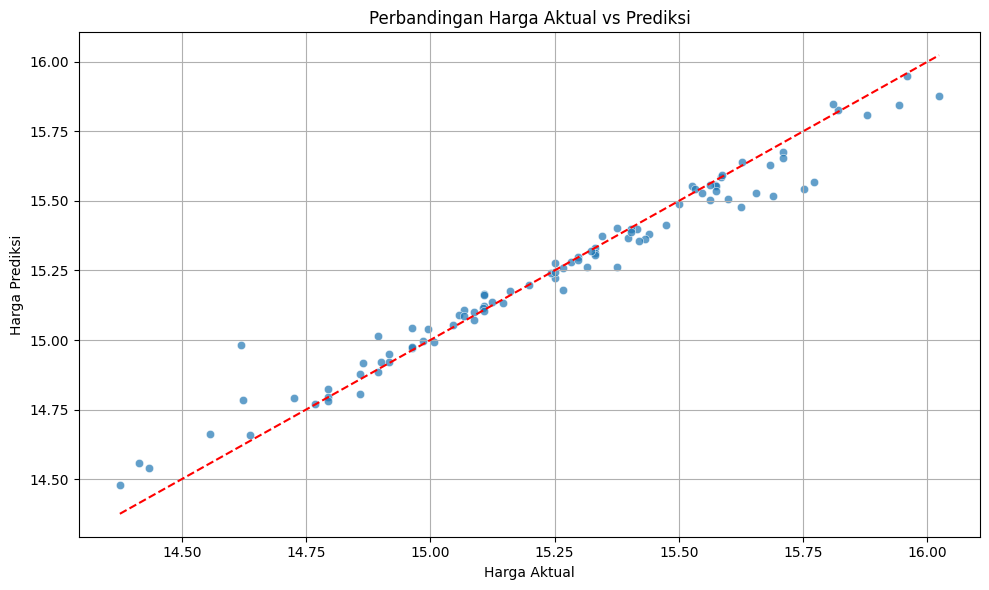

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Perbandingan Harga Aktual vs Prediksi")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

Gambar menunjukkan visualisasi perbandingan antara harga aktual dan harga prediksi dalam bentuk scatter plot. Titik-titik biru merepresentasikan pasangan nilai harga aktual dan prediksi, sedangkan garis putus-putus merah menunjukkan garis ideal (garis referensi) di mana harga prediksi sama persis dengan harga aktual (y = x).

Sebagian besar titik berada cukup dekat dengan garis merah, yang mengindikasikan bahwa model prediksi memiliki performa yang baik dan mampu memprediksi harga dengan akurasi yang cukup tinggi, meskipun terdapat sedikit deviasi pada beberapa titik. Visualisasi ini menunjukkan bahwa hasil prediksi cenderung konsisten dengan nilai aktual.

# Visualizing Residuals

Kode tersebut digunakan untuk memvisualisasikan distribusi residual (selisih antara harga aktual dan harga yang diprediksi) dari model regresi. Residual dihitung dengan mengurangkan nilai prediksi (y_pred) dari nilai aktual (y_test). Hasilnya disimpan dalam variabel residuals.

Kemudian, sebuah histogram dari residuals dibuat menggunakan seaborn.histplot(), dengan parameter kde=True untuk menambahkan garis estimasi kepadatan kernel (KDE) yang memperlihatkan distribusi data secara lebih halus.

Visualisasi ini berguna untuk memeriksa apakah residuals terdistribusi secara acak atau mengikuti pola tertentu. Idealnya, residuals harus terdistribusi normal dan acak untuk memastikan model tidak bias.

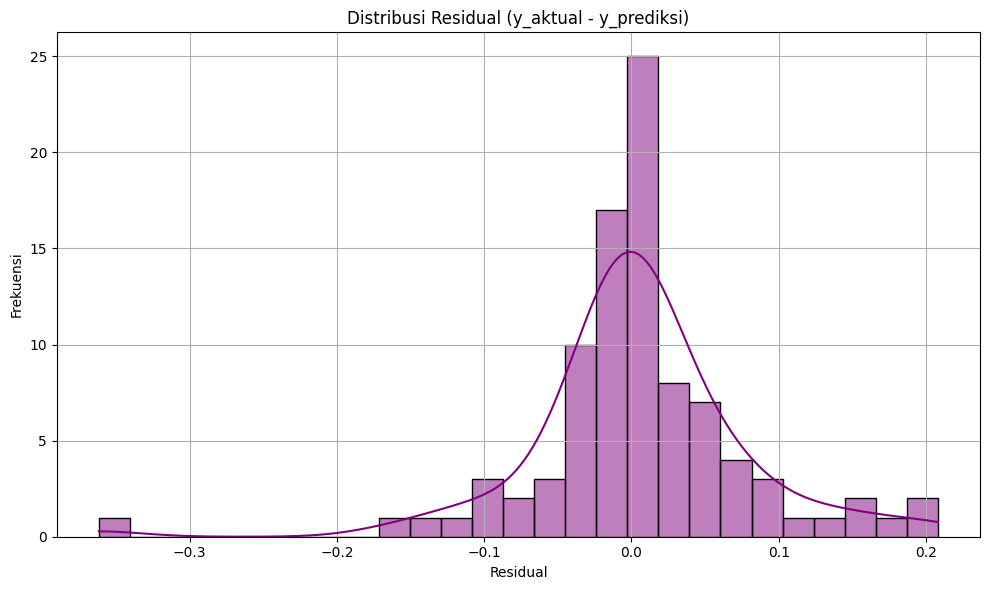

In [29]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribusi Residual (y_aktual - y_prediksi)')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram, QQ Plot, and Shapiro-Wilk Test

Kode bertujuan untuk memeriksa distribusi dan normalitas dari variabel harga yang telah ditransformasi menggunakan logaritma.

1. Histogram dan KDE:

Pertama, kolom price dari dataframe ditransformasi dengan fungsi logaritma natural (np.log()) dan disimpan dalam kolom baru log_price. Kemudian, menggunakan seaborn.histplot() untuk menggambar histogram dari log_price dengan tambahan kurva estimasi kepadatan kernel (KDE) untuk memperlihatkan distribusi data secara lebih halus. Plot ini membantu melihat apakah data terdistribusi dengan baik atau ada ketidakseimbangan.

2. QQ Plot:

Menggunakan scipy.stats.probplot() untuk membuat QQ plot, yang berguna untuk memeriksa apakah data mengikuti distribusi normal. Dalam hal ini, data log_price akan dibandingkan dengan distribusi normal standar. Jika data mengikuti distribusi normal, titik-titik pada plot akan berada di sepanjang garis diagonal.

3. Uji Normalitas (Shapiro-Wilk):

Uji Shapiro-Wilk dilakukan menggunakan stats.shapiro() untuk menguji hipotesis normalitas dari data log_price. Hasil uji ini memberikan dua nilai: statistik uji (stat) dan nilai p (p_value). Jika nilai p lebih kecil dari tingkat signifikansi yang ditentukan (misalnya 0.05), maka hipotesis nol yang menyatakan bahwa data terdistribusi normal akan ditolak, menunjukkan bahwa data tidak terdistribusi normal.


Secara keseluruhan, kode ini digunakan untuk memverifikasi apakah distribusi harga (setelah transformasi logaritma) mengikuti distribusi normal, yang sering kali menjadi asumsi dalam banyak model statistik dan machine learning.

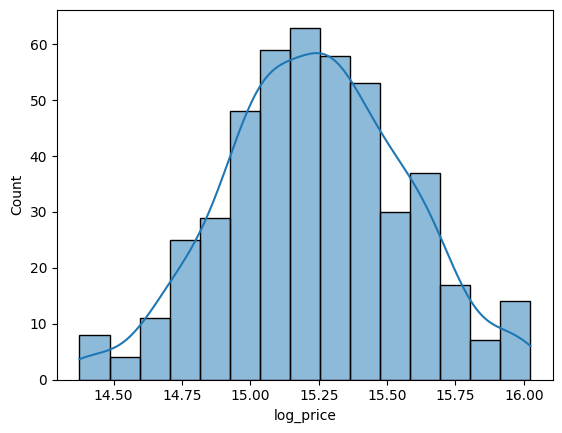

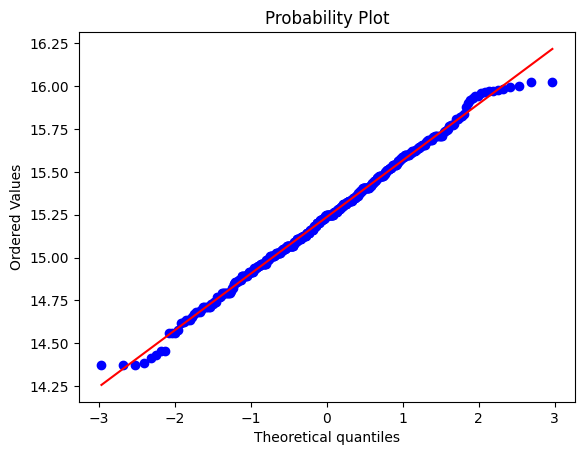

Shapiro-Wilk Test: stat=0.9955961178333472, p-value=0.21896428225607445


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram untuk melihat distribusi
dataframe['log_price'] = np.log(dataframe['price'])
sns.histplot(dataframe['log_price'], kde=True)
plt.show()

# QQ plot untuk memeriksa normalitas
stats.probplot(dataframe['log_price'], dist="norm", plot=plt)
plt.show()

# Uji normalitas (Shapiro-Wilk)
stat, p_value = stats.shapiro(dataframe['log_price'])
print(f"Shapiro-Wilk Test: stat={stat}, p-value={p_value}")

Gambar pertama menunjukkan histogram distribusi variabel log_price yang membentuk kurva menyerupai distribusi normal, menandakan bahwa data log harga telah terdistribusi secara simetris dan tidak mencolok dari asumsi normalitas.

Gambar kedua merupakan plot probabilitas (Q-Q plot) yang memperlihatkan bahwa hampir semua titik berada di sepanjang garis merah, menunjukkan bahwa distribusi log_price sangat mendekati distribusi normal.

Kedua visualisasi ini bersama-sama mengindikasikan bahwa asumsi normalitas pada variabel target telah terpenuhi, yang penting untuk validitas model prediktif berbasis regresi.

Hasil uji Shapiro-Wilk yang Anda peroleh menunjukkan:

1. Statistik uji (stat): 0.9956

2. Nilai p (p-value): 0.2190

Karena nilai p lebih besar dari tingkat signifikansi yang umum digunakan (misalnya 0.05), tidak ada cukup bukti untuk menolak hipotesis nol. Hipotesis nol pada uji Shapiro-Wilk adalah bahwa data mengikuti distribusi normal. Oleh karena itu, hasil ini menunjukkan bahwa data log_price terdistribusi normal.